# 모델 평가
- 모델의 성능을 평가, 평가 결과에 따라 프로세스를 다시 반복

## 분류와 회귀의 평가 방법
### 분류 평가 지표
1. 정확도 (Accuracy)
2. 정밀도 (Precision)
3. 재현률 (Recall)
4. F1점수 (F1 Score)
5. PR Curve, AP Score
6. ROC, AUC Score

### 회귀 평가 방법
1. MSE (Mean Squared Error)
2. RMSE (Root Mean Squared Error)
3. $R^2$ (결정계수)

### sckit-learn 평가 함수 모듈
- sklearn.metrics 모듈을 통해 제공

## 분류(Classification) 평가 지표
### 이진 분류(Binary classification)의 양성(Positive)과 음성(Negative)
- 양성 : 모델이 찾으려는 (추론하려는) 주 대상
- 음성 : 모델이 찾으려는 (추론하려는) 주 대상이 아닌 것

### 정확도(Accuracy)
- 대표적인 분류의 평가 지표
$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$
- 전체 예측 한 것중 맞게 예측한 비율로 평가
- `accuracy_score(정답, 모델 예측값)`

### Accuracy 평가 지표의 문제
- 이진 분류에서 양성에 대한 지표만 확인 할 수 없다.
- 불균형 데이터의 경우 정확한 평가지표가 될 수 없다.

## MNIST Data set 활용

### 데이터 셋 로드 및 활용

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
X = digits.data
y = digits.target

X.shape, y.shape

((1797, 64), (1797,))

In [4]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [5]:
# y 값의 구성 분포
np.unique(y, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

In [6]:
print(y[0])
X[0].reshape(8, 8)

0


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

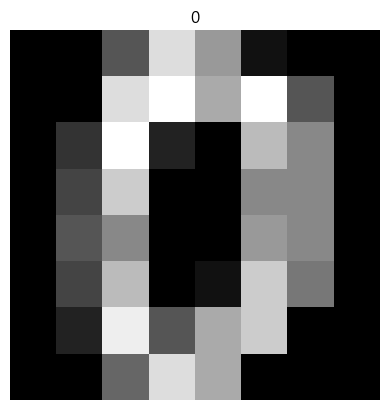

In [7]:
img_index = 0
img = X[img_index].reshape(8, 8)
plt.imshow(img, cmap = 'gray')
plt.title(y[img_index])
plt.axis('off')
plt.show()

### 불균형 데이터셋으로 만들기
- y를 9와 나머지로 변경
- Positive(양성 : 1) : 9
- Negative(음성 : 0) : 0 ~ 8

In [8]:
y = np.where(y == 9, 1, 0) # (조건, True 변환값, False변환값)

In [9]:
print(np.unique(y, return_counts = True))
np.unique(y, return_counts = True)[1]/y.size

(array([0, 1]), array([1617,  180], dtype=int64))


array([0.89983306, 0.10016694])

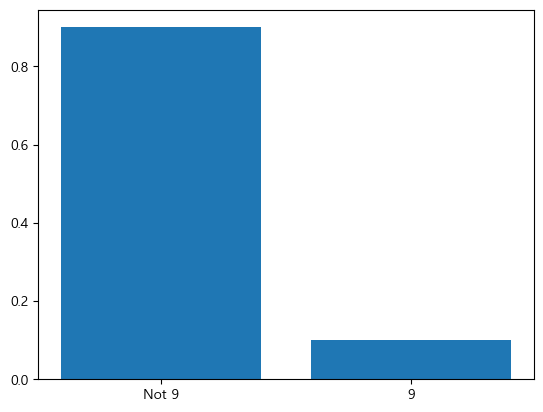

In [10]:
r = np.unique(y, return_counts = True)[1]/y.size
plt.bar([0, 1], r)
plt.xticks([0, 1], ['Not 9', '9'])
plt.show()

### 데이터셋 분할
- train/test로 분할

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

### 모델 생성 및 학습
#### Dummy Model 정의
- dummy model : 진짜 모델이 아닌 모델을 흉내냄
- Target Label중 무조건 최빈값으로 예측하는 모델을 정의

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [13]:
dummy_model = DummyClassifier(strategy = 'most_frequent') # y의 최빈값
dummy_model.fit(X_train, y_train)

# 정확도 검증
pred_train = dummy_model.predict(X_train)
pred_test = dummy_model.predict(X_test)

print('train 정확도:', accuracy_score(y_train, pred_train))
print('test 정확도:', accuracy_score(y_test, pred_test))


train 정확도: 0.8997772828507795
test 정확도: 0.9


In [14]:
np.unique(pred_train), np.unique(pred_test)

(array([0]), array([0]))

아무 학습을 하지 않고 단순히 다수 Label을 정답으로 예측 했는데 90% 정확도가 나옴
=> 정확도가 90% 이지만 10%의 9는 아예 분류하지 못함
따라서 불균형 레이블 데이터 세트의 평가지표로 정확도만 보면 안됨 특히 Positive에 대한 예측이 중요한 경우 accuracy는 알맞은 평가 지표가 아님

## 혼동 행렬(Confusion Matrix)
- 실제 값과 예측한 값을 표로 만든 지표
- 함수 : confusion_matrix(정답, 모델 예측값)
![image](https://velog.velcdn.com/images/jjw9599/post/271fc800-bffb-4e8f-83cf-d55d18ede61a/image.png)

- **TP(True Positive)** 
    - 양성으로 예측했는데 맞은 개수
- **TN(True Negative)** 
    - 음성으로 예측했는데 맞은 개수
- **FP(False Positive)** 
    - 양성으로 예측했는데 틀린 개수 
    - 음성을 양성으로 예측
- **FN(False Negative)** 
    - 음성으로 예측했는데 틀린 개수 
    - 양성을 음성으로 예측

- 예)
```python
[[20, 6],
 [4,  40]]
```

## 이진 분류 평가 지표
- **Accuracy (정확도)**
    - 전체 데이터 중에 맞게 예측한 것의 비율
    - Accuracy(정확도)는 이진 분류 뿐만 아니라 모든 분류의 기본 평가 방식

### 양성(Positive) 예측력 측정 평가 지표
- **Recall / Sensitivity(재현율 / 민감도)**
    - 실제 양성인것 중에 양성으로 예측한 것의 비율
    - **TPR**(True Positive Rate)라 한다
- **Precision(정밀도)**
    - 양성으로 예측한 것 중 실제 양성인 비율
    - **PPV**(Positive Predictive Value)라 한다
- **F1 점수**
    - 정밀도와 재현율의 조화 평균 점수
    - recall과 precision이 비슷할 수록 높은 값을 가짐. F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐저 있지 않고 둘다 좋다고 판단할 수 있는 근거가 됨

### 음성(Negative) 예측력 측정 평가 지표
- **Specificity(특이도)**
    - 실제 음성인 것들 중 음성으로 맞게 예측한 것의 비율
    - **TNR**(True Negative Rate)라 한다
- **Fall out(위양성률)**
    - 실제 음성인 것들 중 양성으로 잘못 예측한 것의 비율
    - `1 - 특이도`
    - **FPR**(False Positive Rate)라 함
    - $Fall Out(FPR) = \cfrac{FP}{TN+FP}$


## 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- **confusion_matrix(y 실제값, y 예측값)**
- **ConfusionMatrixDisplay(Confusion matrix 시각화 클래스)**
    - PlotConfusionMatrix
        - 혼돈 행렬 반환
- **recall_score(y 실제값, y 예측값)**
    - Recall 점수 반환
- **precision_score(y 실제값, y 예측값)**
    - Precision 점수 반환
- **f1_score(y 실제값, y 예측값)**
    - F1 점수 반환
- **classification_report(y 실제값, y 예측값)**
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여줌

### Dummy 모델 혼동 행렬

In [15]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, ConfusionMatrixDisplay

In [16]:
# 정확도
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred_test))

0.8997772828507795
0.9


In [17]:
print('confusion matrix')
print('train')
print(confusion_matrix(y_train, pred_train))
print('test')
print(confusion_matrix(y_test, pred_test))

confusion matrix
train
[[1212    0]
 [ 135    0]]
test
[[405   0]
 [ 45   0]]


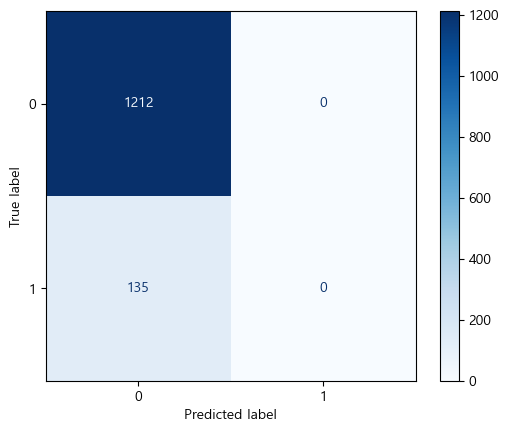

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_train, pred_train))

disp.plot(cmap = 'Blues')
plt.show()

### Dummy 모델 Accuracy, Recall, Precision, F1-Score

In [19]:
recall_score(y_train, pred_train), recall_score(y_test, pred_test)

(0.0, 0.0)

In [20]:
precision_score(y_train, pred_train), precision_score(y_test, pred_test)

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

In [21]:
f1_score(y_train, pred_train), f1_score(y_test, pred_test)

(0.0, 0.0)

### classification_report()
- Accuracy와 각 class Positive일 때의 recall, precision, f1-score를 한번에 보여줌

In [22]:
from sklearn.metrics import classification_report

report = classification_report(y_train, pred_train)
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1212
           1       0.00      0.00      0.00       135

    accuracy                           0.90      1347
   macro avg       0.45      0.50      0.47      1347
weighted avg       0.81      0.90      0.85      1347



c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 머신러닝 모델을 이용해 학습
- DecisionTreeClassifier 사용 (max_depth = 3)
- RandomForestClassifier 사용 (n_estimators = 100, max_depth = 3)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [24]:
%%writefile metrics.py
# 평가 지표 저장 모듈
__version__ = 1.0

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, ConfusionMatrixDisplay

def plot_confusion_matrix(y, pred, title=None):
    """
    Confusion Matrix 시각화 함수
    [parameter]
        y: ndarray - 정답
        pred: ndarray - 모델 예측값
        title: str - 그래프 제목
    [return]
    [exception]
    """
    
    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues')
    if title:
        plt.title(title)
    plt.show()
    
def print_metrics_classification(y, pred, title = None):
    """
    classification(분류) 결과들을 출력하는 함수
    accuracy, recall, precision, f1_score
    [parameter]
        y: ndarray - 정답
        pred: ndarray - 모델 예측값
        title: str - 그래프 제목
    [return]
    [exception]
    """
    if title:
        print(title)
    print('정확도(accuracy):', accuracy_score(y, pred))
    print('재현율/민감도(recall):', recall_score(y, pred))
    print('정밀도(precision):', precision_score(y, pred))
    print('F1-score:', f1_score(y, pred))

Overwriting metrics.py


In [25]:
from metrics import print_metrics_classification, plot_confusion_matrix

In [26]:
# 모델 생성
tree = DecisionTreeClassifier(max_depth = 3, random_state = 0)
rfc = RandomForestClassifier(n_estimators = 200, max_depth = 3, random_state = 0)

# 학습
tree.fit(X_train, y_train)
rfc.fit(X_train, y_train)

# 추론
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

pred_train_rfc = rfc.predict(X_train)
pred_test_rfc = rfc.predict(X_test)

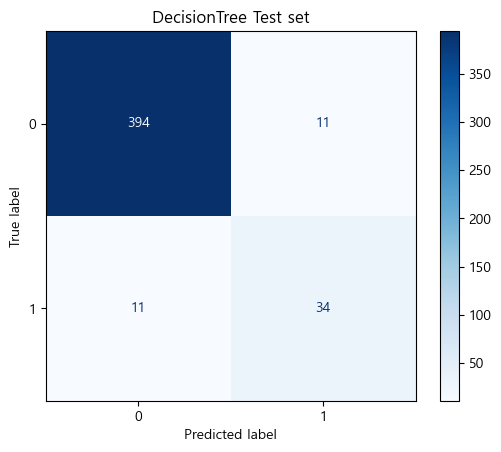

In [27]:
## confusion matrix
plot_confusion_matrix(y_test, pred_test_tree, 'DecisionTree Test set')

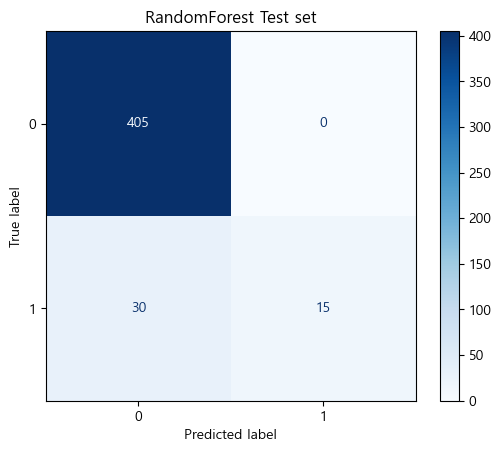

In [28]:
plot_confusion_matrix(y_test, pred_test_rfc, 'RandomForest Test set')

In [29]:
print('######## Decision Tree 검증 결과 ########')
print_metrics_classification(y_train, pred_train_tree, title = 'Train set')
print('='*40)
print_metrics_classification(y_test, pred_test_tree, title = 'Test set')

######## Decision Tree 검증 결과 ########
Train set
정확도(accuracy): 0.9465478841870824
재현율/민감도(recall): 0.8
정밀도(precision): 0.7058823529411765
F1-score: 0.7500000000000001
Test set
정확도(accuracy): 0.9511111111111111
재현율/민감도(recall): 0.7555555555555555
정밀도(precision): 0.7555555555555555
F1-score: 0.7555555555555555


In [30]:
print('######## Random Forest 검증 결과 ########')
print_metrics_classification(y_train, pred_train_rfc, title = 'Train set')
print('='*40)
print_metrics_classification(y_test, pred_test_rfc, title = 'Test set')

######## Random Forest 검증 결과 ########
Train set
정확도(accuracy): 0.9354120267260579
재현율/민감도(recall): 0.35555555555555557
정밀도(precision): 1.0
F1-score: 0.5245901639344263
Test set
정확도(accuracy): 0.9333333333333333
재현율/민감도(recall): 0.3333333333333333
정밀도(precision): 1.0
F1-score: 0.5


## Recall과 Precision의 관계
### Recall이 더 중요한 경우 (정답이 1인 것을 찾는 비율)
- 실제 Positive 데이터를 Negative로 잘못 판단하면 업무상 큰 영향이 있는 경우
- FN(False Negative)를 낮추는데 초점을 맞춤
- 암환자 판정 모델, 보험사기 적발 모델

### Precision이 더 중요한 경우 (Positive 예측이 얼마나 맞았는지에 대한 비율)
- 실제 Negative 데이터를 Positive로 잘못 판단하면 업무상 큰 영향이 있는 경우
- FP(False Positive)를 낮추는데 초점을 맞춘다
- 스팸메일 판정
![image](https://velog.velcdn.com/images/ppippi/post/97e2bfc0-2438-430b-a4ed-78685d68a81c/image.png)
- Positive일 확률이 임계값 이상이면 Positive, 미만이면 Negative로 예측

### 임계값 변경에 따른 정밀도와 재현율 변화
- 임계값을 높이면 음성으로 예측되는 샘플이 많아짐. 그래서 정밀도는 높아지고 재현율은 낮아짐
- 임계값을 낮추면 양성으로 예측하는 기준이 낮아져 양성으로 예측되는 샘플이 많아짐. 그래서 재현율은 높아지고 정밀도는 낮아짐
- 정리
    - 임계값을 낮추면 재현율은 올라가고 정밀도는 낮아짐
    - 임계값을 높이면 재현율은 낮아지고 정밀도는 올라감
- 임계값을 변화시켰을때 재현율과 정밀도는 반비례 관계를 가진다
- 임계값을 변화시켰을때 재현율과 위양성율은 비례 관계를 가짐

### 임계값 변화에 따른 recall, precision 변화
#### 분류 모델의 추론 메소드
- model.predict(X
    - 추론한 X의 class를 반환
- model.predict_proba(X)
    - 추론한 X의 class별 확률을 반환

In [31]:
tree.predict(X_test[:5])

array([0, 0, 0, 0, 0])

In [33]:
r = tree.predict_proba(X_test[:5])
print(r.shape)
r

(5, 2)


array([[0.99173554, 0.00826446],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348]])

In [34]:
# 양성 (1)의 확률만 추출
np.where(r[:, 1] > 0.01, 1, 0)

array([0, 1, 1, 1, 1])

### 임계값 변화에 따른 recall/precision 확인
- **precision_recall_curve(y_정답, positive_예측확률) 이용**
    - 반환값 : Tuple - (precision리스트, recall리스트, threshold리스트)
        - threshold(임계값) 0에서 1까지 변경하며 변화되는 precision과 recall값을 반환

In [35]:
# DecisionTree -> Test set
from sklearn.metrics import precision_recall_curve

pos_proba_test = tree.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba_test)

precisions.shape, recalls.shape, thresholds.shape

((8,), (8,), (7,))

In [36]:
# thresholds에 1을 추가
thresholds = np.append(thresholds, 1)

In [37]:
thresholds


array([0.00826446, 0.01304348, 0.03389831, 0.04      , 0.14925373,
       0.54545455, 0.75      , 1.        ])

In [38]:
precisions

array([0.1       , 0.10757946, 0.43181818, 0.51388889, 0.56060606,
       0.75555556, 0.82352941, 1.        ])

In [39]:
recalls

array([1.        , 0.97777778, 0.84444444, 0.82222222, 0.82222222,
       0.75555556, 0.62222222, 0.        ])

In [43]:
# dataframe으로 확인
import pandas as pd

prc_df = pd.DataFrame({
    'Threshold' : thresholds,
    'Recall' : recalls,
    'Precision' : precisions
})

prc_df

,Threshold,Recall,Precision
0,0.008264,1.000000,0.100000
1,0.013043,0.977778,0.107579
2,0.033898,0.844444,0.431818
3,0.040000,0.822222,0.513889
4,0.149254,0.822222,0.560606
5,0.545455,0.755556,0.755556
6,0.750000,0.622222,0.823529
7,1.000000,0.000000,1.000000


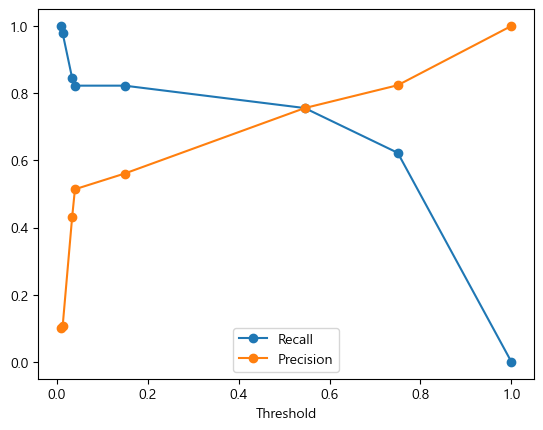

In [44]:
prc_df.set_index('Threshold').plot(marker = 'o')
plt.show()

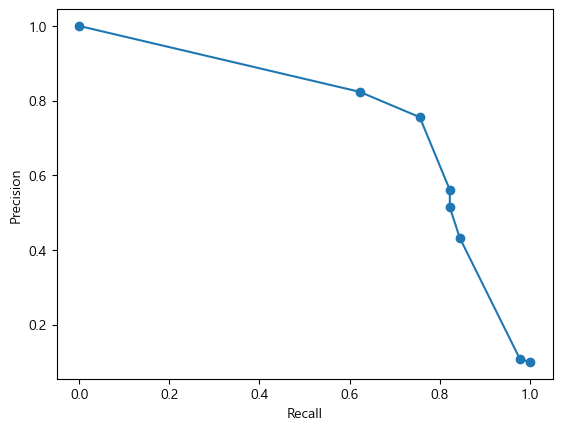

In [45]:
plt.plot(prc_df['Recall'], prc_df['Precision'], marker = 'o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

### 임계값 변경 후처리를 통한 recall/precision 변경
#### 모델 예측 결과에 적용

In [46]:
# test set
pos_test_tree = tree.predict_proba(X_test)[:, 1]

pred_test_tree = np.where(pos_test_tree > 0.1, 1, 0)
print_metrics_classification(y_test, pred_test_tree, title='Threshold : 0.1')

Threshold : 0.1
정확도(accuracy): 0.9177777777777778
재현율/민감도(recall): 0.8222222222222222
정밀도(precision): 0.5606060606060606
F1-score: 0.6666666666666666


In [47]:
pred_test_tree = np.where(pos_test_tree > 0.5, 1, 0)
print_metrics_classification(y_test, pred_test_tree, title = 'Threshold : 0.5')

Threshold : 0.5
정확도(accuracy): 0.9511111111111111
재현율/민감도(recall): 0.7555555555555555
정밀도(precision): 0.7555555555555555
F1-score: 0.7555555555555555


In [48]:
pred_test_tree = np.where(pos_test_tree > 0.6, 1, 0)
print_metrics_classification(y_test, pred_test_tree, title = 'Threshold : 0.6')

Threshold : 0.6
정확도(accuracy): 0.9488888888888889
재현율/민감도(recall): 0.6222222222222222
정밀도(precision): 0.8235294117647058
F1-score: 0.7088607594936709


## PR Curve(Precision Recall Curve - 정밀도 재현율 곡선)와 AP Score(Average Precision Score)
- Positive 확률 0~1 사이의 모든 임계값에 대하여 재현율(recall)과 정밀도(precision)의 변화를 이용한 평가 지표
- X축에 재현율, Y축에 정밀도를 놓고 임계값이 1 -> 0 변화할때 두 값의 변화를 선그래프로 그린다
- AP Score
    - PR Curve의 성능평가 지표를 하나의 점수(숫자)로 평가한것
    - PR Curve의 선아래 면적을 계산한 값으로 높을수록 성능이 우수
    ![image](https://blog.kakaocdn.net/dn/BsiXJ/btqOYvFcLMP/Onezxrw6GMFfMDOyKTSXH0/img.png)

0.6766948888666132


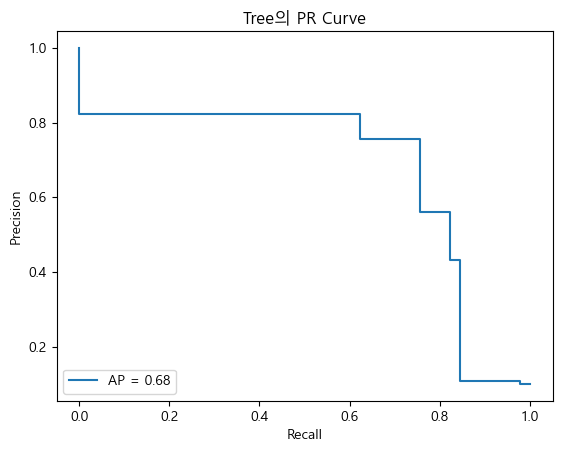

In [50]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import matplotlib.pyplot as plt

# Positive 확률
test_proba_tree = tree.predict_proba(X_test)[:, 1]
test_proba_rfc = rfc.predict_proba(X_test)[:, 1]

ap_score_tree = average_precision_score(y_test, test_proba_tree)
print(ap_score_tree)

precision1, recalls1, threshs1 = precision_recall_curve(y_test, test_proba_tree)
disp_tree = PrecisionRecallDisplay(precision1, recalls1, average_precision = ap_score_tree)
disp_tree.plot()
plt.title('Tree의 PR Curve')
plt.show()

0.8775487970449387


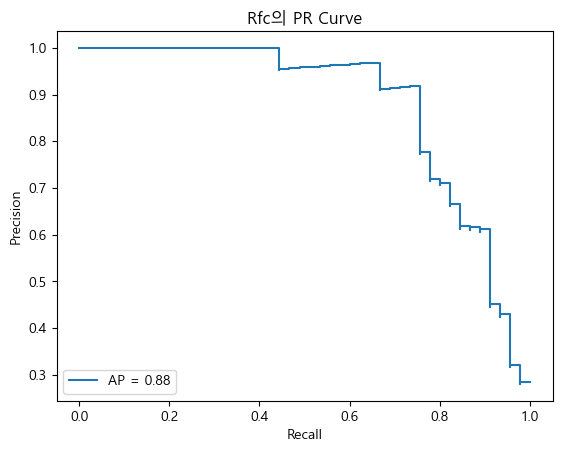

In [51]:
# rfc test set에 대한 PR Curve
ap_score_rfc = average_precision_score(y_test, test_proba_rfc)
print(ap_score_rfc)

precision2, recalls2, threshs2 = precision_recall_curve(y_test, test_proba_rfc)
disp_rfc = PrecisionRecallDisplay(precision2, recalls2, average_precision = ap_score_rfc)
disp_rfc.plot()
plt.title('Rfc의 PR Curve')
plt.show()

### 비교를 위해 한개의 subplot에 tree/rfc의 PR Curve 그리기

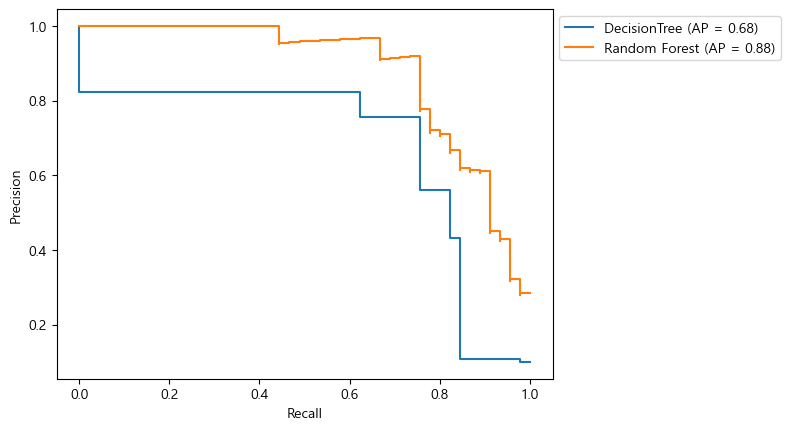

In [52]:
ax = plt.gca() # subplot(axes)를 조회

disp_tree = PrecisionRecallDisplay(precision1, recalls1, average_precision = ap_score_tree, estimator_name = 'DecisionTree') # 범례에 나올 이름
disp_rfc = PrecisionRecallDisplay(precision2, recalls2, average_precision=ap_score_rfc, estimator_name = 'Random Forest')

disp_tree.plot(ax = ax) # ax=ax : 그래프를 그릴 subplot을 지정
disp_rfc.plot(ax = ax)
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.show()

### ROC curve(Receiver Operating Characteristic Curve)와 AUC(Area Under the Curve) score
- **FPR(False Positive Rate-위양성율)**
    - 위양성율 (fall-out)
    - 1-특이도(TNR)
    - 실제 음성중 양성으로 잘못 예측 한 비율
    $$
    \cfrac{FP}{TN+FP}
    $$
- **TPR(True Positive Rate-재현율/민감도)** 
    - 재현율(recall)
    - 실제 양성중 양성으로 맞게 예측한 비율
    $$
    \frac{TP}{FN+TP}
    $$

- **ROC Curve**
    - 2진 분류의 모델 성능 평가 지표 중 하나.
    - FPR을 X축, TPR을 Y축으로 놓고 임계값을 변경해서 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선.
    - FPR과 TPR의 변화는 비례해서 변화한다.
        - 낮은 임계값에서 큰 임계값으로 변경하면 높은 값에서 낮은 값으로 같이 변화한다.

- **AUC Score**
    - ROC Curve의 결과를 점수화(수치화) 하는 함수로 ROC Curve 아래쪽 면적을 계산한다.
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
        - AUC Score값이 크려면(1에 가까운 값) 임계값이 클 때 FPR은 작고, TPR의 값은 커야 한다. FPR이 작다는 것은 Negative 잘 분류했다는 것이고 TPR이 크다는 것은 Positive를 잘 분류 했다는 의미이므로 둘에 대한 분류성능이 좋다는 것을 의미한다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델

![image](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*-dBz1HonBn39H0xc.png)
- 가장 완벽한 것은 FPR이 0이고 TPR이 1인 것이다. 일반적으로 FPR이 작을 때(0에 가까울때) TPR이 높은 경우가 좋은 상황이다. 그래서 선 아래의 면적이 넓은 곡선이 나올수록 좋은 모델이다

### ROC, AUC 점수 확인
- roc_curve(y값, Pos_예측확률) : FPR, TPR, Thresholds (임계치)
- roc_auc_score(y값, Pos_예측확률) : AUC 점수 반환

### ROC Curve / Precision_Recall Curve
- **ROC Curve/ROC-AUC score**
    - 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 중요도가 비슷할 때 사용
- **Precision Recall Curve/AP Score**
    - 양성 클래스 탐지가 음성클래스 탐지의 중요도보다 높을 경우 사용

In [53]:
# ROC Curve 시각화
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

# threshold 변화에 따른 fpr과 tpr값들을 조회 - roc_curve
fprs1, tprs1, thresh1 = roc_curve(y_test, test_proba_tree)
print(fprs1.shape, tprs1.shape, thresh1.shape)
fprs2, tprs2, thresh2 = roc_curve(y_test, test_proba_rfc)
print(fprs2.shape, tprs2.shape, thresh2.shape)

(8,) (8,) (8,)
(30,) (30,) (30,)


In [54]:
pd.DataFrame({'임계값':thresh1, 'FPR':fprs1, 'TPR':tprs1})

,임계값,FPR,TPR
0,1.750000,0.000000,0.000000
1,0.750000,0.014815,0.622222
2,0.545455,0.027160,0.755556
3,0.149254,0.071605,0.822222
4,0.040000,0.086420,0.822222
5,0.033898,0.123457,0.844444
6,0.013043,0.901235,0.977778
7,0.008264,1.000000,1.000000


In [55]:
pd.DataFrame({'임계값':thresh2, 'FPR':fprs2, 'TPR':tprs2})

,임계값,FPR,TPR
0,1.644297,0.000000,0.000000
1,0.644297,0.000000,0.022222
2,0.453446,0.000000,0.444444
3,0.447451,0.002469,0.444444
4,0.327547,0.002469,0.666667
5,0.321028,0.007407,0.666667
6,0.282455,0.007407,0.755556
7,0.240723,0.024691,0.755556
8,0.238526,0.024691,0.777778
9,0.217295,0.034568,0.777778


0.8975308641975308


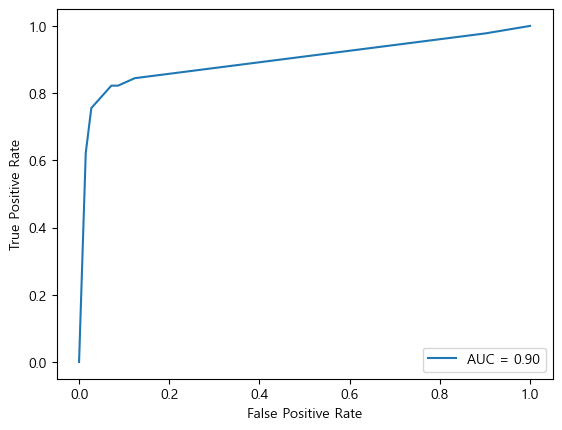

In [56]:
roc_auc_tree = roc_auc_score(y_test, test_proba_tree)
print(roc_auc_tree)

disp_roc_tree = RocCurveDisplay(fpr = fprs1, tpr=tprs1, roc_auc = roc_auc_tree)
disp_roc_tree.plot()
plt.show()

0.9742661179698217


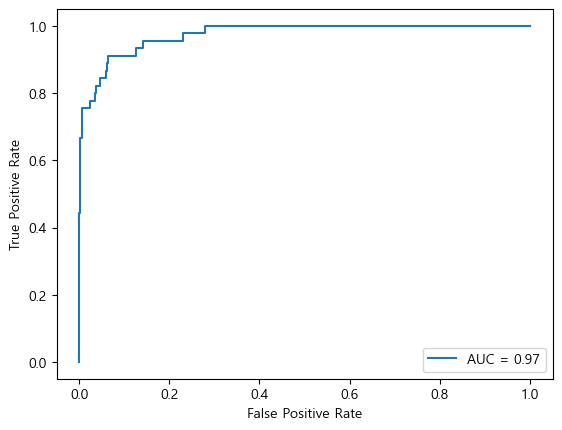

In [57]:
roc_auc_rfc = roc_auc_score(y_test, test_proba_rfc)
print(roc_auc_rfc)
disp_roc_rfc = RocCurveDisplay(fpr = fprs2, tpr = tprs2, roc_auc = roc_auc_rfc)
disp_roc_rfc.plot()
plt.show()

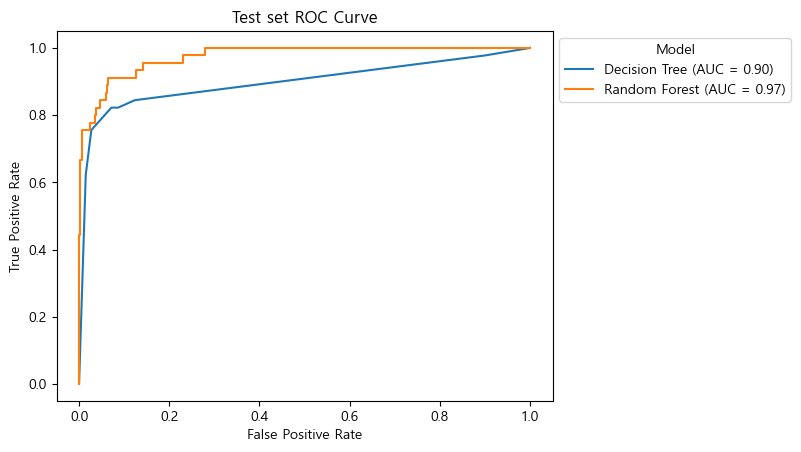

In [58]:
ax = plt.gca()

disp_roc_tree = RocCurveDisplay(fpr=fprs1, tpr=tprs1, roc_auc = roc_auc_tree, estimator_name = 'Decision Tree')
disp_roc_rfc = RocCurveDisplay(fpr = fprs2, tpr = tprs2, roc_auc = roc_auc_rfc, estimator_name = 'Random Forest')

disp_roc_tree.plot(ax = ax)
disp_roc_rfc.plot(ax = ax)

plt.title('Test set ROC Curve')
plt.legend(loc='upper left', bbox_to_anchor = (1, 1), title = 'Model')
plt.show()